# Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

## Classify Critical Points Graphically

Let $f(x,y)$ be a differentiable function. A critical point of $f(x,y)$ is a point $(a,b) \in \mathbb{R}^2$ where $\nabla f(a,b) = 0$. All local maximum and local minimum values of $f(x,y)$ occur at critical points therefore our strategy to optimize a differentiable function $f(x,y)$ is to solve the system of equations

$$
\nabla f = 0
$$

For example, consider the function

$$
f(x,y) = 10x^2y - 5x^2 - 4y^2 - x^4 - 2y^4
$$

Create a contour plot of $f(x,y)$ in a region near the origin:

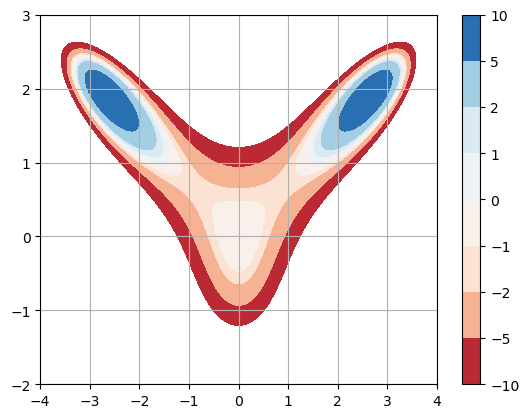

In [4]:
f = lambda x,y: 10*x**2*y - 5*x**2 - 4*y**2 - x**4 - 2*y**4

x = np.linspace(-4,4,100)
y = np.linspace(-2,3,100)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,f(X,Y),levels=[-10,-5,-2,-1,0,1,2,5,10],cmap='RdBu')
plt.colorbar(), plt.grid(True)
plt.show()

Compute the partial derivatives of $f(x,y)$:

$$
\begin{align*}
f_x &= 20xy - 10x - 4x^3 \\
f_y &= 10x^2 - 8y - 8y^3
\end{align*}
$$

and setup the system of equations $\nabla f = 0$:

$$
\begin{align*}
20xy - 10x - 4x^3 &= 0 \\
10x^2 - 8y - 8y^3 &= 0
\end{align*}
$$

Plot the curves $f_x = 0$ and $f_y = 0$ with the contour plot:

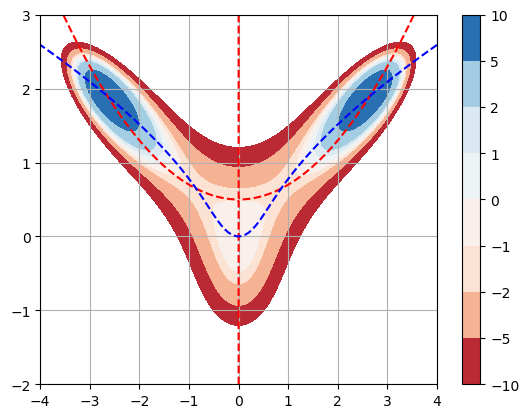

In [8]:
f = lambda x,y: 10*x**2*y - 5*x**2 - 4*y**2 - x**4 - 2*y**4
fx = lambda x,y: 20*x*y - 10*x - 4*x**3
fy = lambda x,y: 10*x**2 - 8*y - 8*y**3

x = np.linspace(-4,4,100)
y = np.linspace(-2,3,100)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,f(X,Y),levels=[-10,-5,-2,-1,0,1,2,5,10],cmap='RdBu')
plt.colorbar()
plt.contour(X,Y,fx(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='b',linestyles='dashed')
plt.grid(True)
plt.show()

The critical are where the curve $f_x = 0$ and $f_y = 0$ intersect. We can see that there are 5 critical points in the figure above. Estimate the coordinates of the points and classify them by inspecting the graph:

* local maximum at the origin $(0,0)$
* local maximum near $(2.6,1.9)$
* local maximum near $(-2.6,1.9)$
* saddlepoint near $(0.8,0.7)$
* saddlepoint near $(-0.8,0.7)$

## Compute Critical Points with SciPy

A system of nonlinear equations is usually very difficult (or impossible!) to solve explicitly using simple algebra.

In the example above, we can solve the first equation for $y$ (assuming $x \ne 0$)

$$
y = x \left(\frac{1}{2} + \frac{x}{5} \right) \ \ , \ x \ne 0
$$

and then substitute into the second equation to get

$$
10x - 8 \left(\frac{1}{2} + \frac{x}{5} \right) - 8x^3 \left(\frac{1}{2} + \frac{x}{5} \right)^3 = 0
$$

But this is a polynomial of degree 6 for which there is no algebraic formula for the roots. So what do we do? We can always approximate solutions of equations using numerical methods such as Newton's method.

The function `scipy.optimize.root` computes solutions of the vector equation $\mathbf{F}(\mathbf{w}) = 0$ given an initial guess $\mathbf{w}_0$. In the code below, we define the vector function `grad` which represents $\nabla f$ and we compute a solution of $\nabla f = \mathbf{0}$ near the point $\mathbf{w}_0 = (2.6,1.9)$. The output of the function `scipy.optimize.root` is an object which we store as `result` and we access the approximation by the attribute `result.x`.

In [11]:
fx = lambda x,y: 20*x*y - 10*x - 4*x**3
fy = lambda x,y: 10*x**2 - 8*y - 8*y**3

# Vector w = (x,y) => w[0] = x and w[1] = y
grad = lambda w: np.array([fx(w[0],w[1]),fy(w[0],w[1])])

result1 = root(grad,[2.6,1.9])
point1 = result1.x

print(point1)

[2.6442243  1.89838443]


Repeat the computation with initial guess $[-2.6,1.9]$:

In [12]:
result2 = root(grad,[-2.6,1.9])
point2 = result2.x
print(point2)

[-2.6442243   1.89838443]


Repeat the computation with initial guess $[0.8,0.7]$:

In [13]:
result3 = root(grad,[0.8,0.7])
point3 = result3.x
print(point3)

[0.85665687 0.6467722 ]


Repeat the computation with initial guess $[-0.8,0.7]$:

In [14]:
result4 = root(grad,[-0.8,0.7])
point4 = result4.x
print(point4)

[-0.85665687  0.6467722 ]


Plot level curves of $f(x,y)$, curves $f_x = 0$ and $f_y = 0$, and critical points:

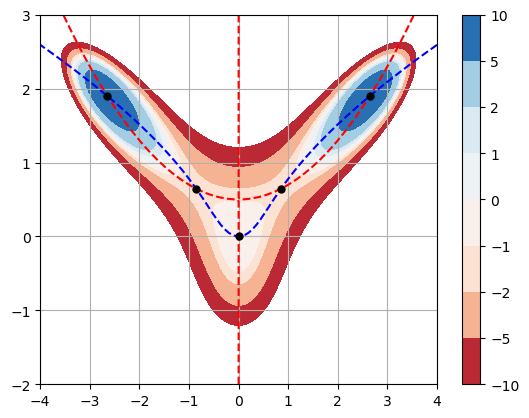

In [30]:
f = lambda x,y: 10*x**2*y - 5*x**2 - 4*y**2 - x**4 - 2*y**4
fx = lambda x,y: 20*x*y - 10*x - 4*x**3
fy = lambda x,y: 10*x**2 - 8*y - 8*y**3

x = np.linspace(-4,4,100)
y = np.linspace(-2,3,100)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,f(X,Y),levels=[-10,-5,-2,-1,0,1,2,5,10],cmap='RdBu'), plt.colorbar()
plt.contour(X,Y,fx(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='b',linestyles='dashed')
plt.plot(0,0,'k.',ms=10)
plt.plot(point1[0],point1[1],'k.',ms=10)
plt.plot(point2[0],point2[1],'k.',ms=10)
plt.plot(point3[0],point3[1],'k.',ms=10)
plt.plot(point4[0],point4[1],'k.',ms=10)
plt.grid(True)
plt.show()

## Exercise 1

Let $f(x,y) =  y^6 - 2y^4 + x^2 - y^2 + y$.

* In the same figure, plot level curves of $f(x,y)$ along with the curves $f_x(x,y) = 0$ and $f_y(x,y) = 0$.
* Classify the critical points by inspecting the contour plots.
* Compute coordinates of the critical points.

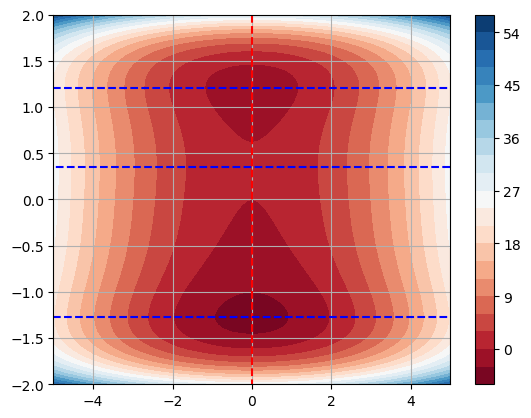

In [35]:
f = lambda x,y: y**6 - 2*y**4 + x**2 - y**2 + y
fx = lambda x,y: 2*x
fy = lambda x,y: 6*y**5 - 8*y**3 - 2*y + 1

x = np.linspace(-5,5,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,f(X,Y),levels=20,cmap='RdBu')
plt.colorbar()
plt.contour(X,Y,fx(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='b',linestyles='dashed')
plt.grid(True)
plt.show()

## Exercise 2

Let $f(x,y) = e^{-(x^2+y^2)} \left( x^2 + y^3 - 1 \right)$.

* In the same figure, plot level curves of $f(x,y)$ along with the curves $f_x(x,y) = 0$ and $f_y(x,y) = 0$.
* Classify the critical points by inspecting the contour plots.
* Compute coordinates of the critical points.

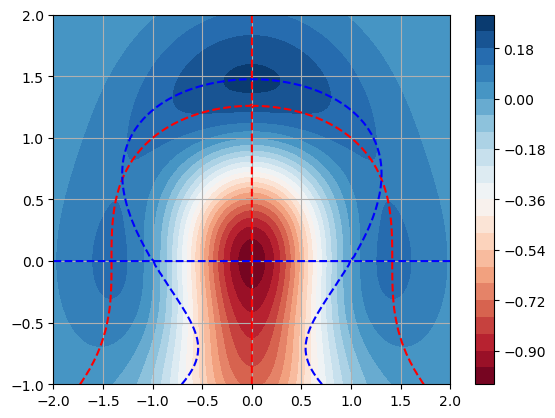

In [20]:
f = lambda x,y: np.exp(-x**2-y**2)*(x**2 + y**3 - 1)
fx = lambda x,y: -2*x*np.exp(-x**2-y**2)*(x**2 + y**3 - 1) + 2*x*np.exp(-x**2-y**2)
fy = lambda x,y: -2*y*np.exp(-x**2-y**2)*(x**2 + y**3 - 1) + 3*y**2*np.exp(-x**2-y**2)

x = np.linspace(-2,2,100)
y = np.linspace(-1,2,100)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,f(X,Y),levels=20,cmap='RdBu')
plt.colorbar()
plt.contour(X,Y,fx(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='b',linestyles='dashed')
plt.grid(True)
plt.show()

## Exercise 3

Let $f(x,y) = \displaystyle \frac{\cos(x + y)}{1 + x^2 + y^2}$, $|x| \le 3$, $|y| \le 3$.

* In the same figure, plot level curves of $f(x,y)$ along with the curves $f_x(x,y) = 0$ and $f_y(x,y) = 0$.
* Classify the critical points by inspecting the contour plots.
* Compute coordinates of the critical points.

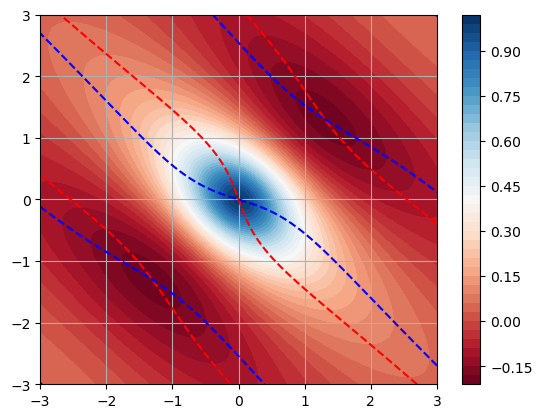

In [64]:
f = lambda x,y: np.cos(x + y)/(1 + y**2 + x**2)
fx = lambda x,y: -np.sin(x+y)/(1 + y**2 + x**2) - np.cos(x+y)*2*x/(1 + y**2 + x**2)**2
fy = lambda x,y: -np.sin(x+y)/(1 + y**2 + x**2) - np.cos(x+y)*2*y/(1 + y**2 + x**2)**2

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y,f(X,Y),levels=40,cmap='RdBu')
plt.colorbar()
plt.contour(X,Y,fx(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='b',linestyles='dashed')
plt.grid(True)
plt.show()

## Example: Constrained Optimization

Let $f(x,y) = xe^y$ subject to $x^2 + y^2 = 2$. The code below plots the level curves of $f(x,y)$, the curve $g(x,y)=0$ and the gradients $\nabla f$ and $\nabla g$ at a point $(x_p,y_p)$.

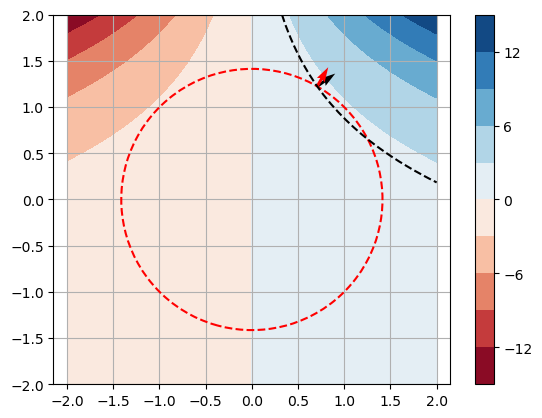

f(x,y) = 2.406494877410645


In [137]:
f = lambda x,y: x*np.exp(y)
fx = lambda x,y: np.exp(y)
fy = lambda x,y: x*np.exp(y)

g = lambda x,y: x**2 + y**2 - 2
gx = lambda x,y: 2*x
gy = lambda x,y: 2*y

x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)

# Choose a point on the curve g(x,y) = 0
xp = 1/np.sqrt(2)
yp = np.sqrt(2 - xp**2)
print('f(x,y) =',f(xp,yp))

plt.contourf(X,Y,f(X,Y),levels=10,cmap='RdBu'), plt.colorbar()
plt.contour(X,Y,g(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,f(X,Y),levels=[f(xp,yp)],colors='k',linestyles='dashed')

plt.quiver(xp,yp,fx(xp,yp),fy(xp,yp),color='k')
plt.quiver(xp,yp,gx(xp,yp),gy(xp,yp),color='r')
plt.axis('equal'), plt.grid(True)
plt.show()

## Exercise 4

Complete the code below to find the maximum value of $f(x,y) = 1 - 2x^4 - y^2$ subject to the constraint $y^2 = 1 + x^3 - x$. (Use trial and error on `xp` and `yp` and observe the results in the figure.)

f(x,y) = 0.28479999999999983


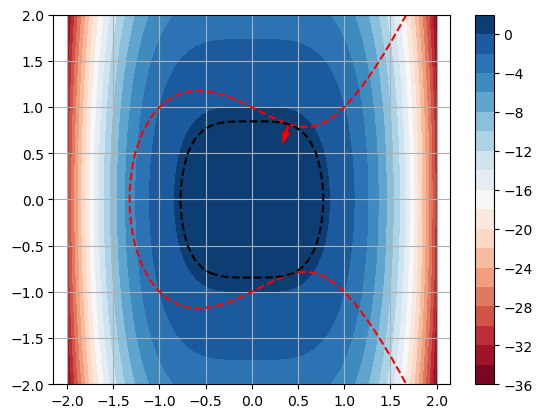

In [138]:
f = lambda x,y: 1 - 2*x**4 - y**2
fx = lambda x,y: -8*x**3
fy = lambda x,y: -2*y

g = lambda x,y: 1 + x**3 - x - y**2
gx = lambda x,y: 3*x**2 - 1
gy = lambda x,y: -2*y

x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)

# Choose a point on the curve g(x,y) = 0
xp = 0.4
yp = np.sqrt(1 + xp**3 - xp)
print('f(x,y) =',f(xp,yp))

plt.contourf(X,Y,f(X,Y),levels=20,cmap='RdBu'), plt.colorbar()
plt.contour(X,Y,g(X,Y),levels=[0],colors='r',linestyles='dashed')
plt.contour(X,Y,f(X,Y),levels=[f(xp,yp)],colors='k',linestyles='dashed')

plt.quiver(xp,yp,fx(xp,yp),fy(xp,yp),color='k')
plt.quiver(xp,yp,gx(xp,yp),gy(xp,yp),color='r')
plt.axis('equal'), plt.grid(True)
plt.show()